# Investigating Appropriate Rank
In the first section, I am going to investigate what an appropriate rank to consider should be. It will make sense to look at the 
ranks of a trained matrix and a randomly initialized matrix. We will start by looking at a randomly initialized matrix and then
look at a trained matrix. Specifically, I will look at the rank of a randomly initialized matrix. I will need to consider the sizes 
that are seen in RoBERTa

In [1]:
# Import Appropriate Libraries
import torch
import matplotlib.pyplot as plt 
import bisect

In [24]:
def get_principle_direction(A, exp_var):
    U, S, V = torch.linalg.svd(A)
    X = (torch.cumsum(S, 0) / S.sum().item()).tolist()
    num = bisect.bisect(X, exp_var)
    return num

def plot_results(n=100, size=[768, 768], exp_var=0.99):
    results = []
    for _ in range(n):
        A = torch.randn(size)
        num = get_principle_direction(A, exp_var)
        results.append(num)
    return results

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/mathadoor/Documents/peft-study/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf', name='cmex10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/mathadoor/Documents/peft-study/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/mathadoor/Documents/peft-st

(array([43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 57.]),
 array([515. , 515.1, 515.2, 515.3, 515.4, 515.5, 515.6, 515.7, 515.8,
        515.9, 516. ]),
 <BarContainer object of 10 artists>)

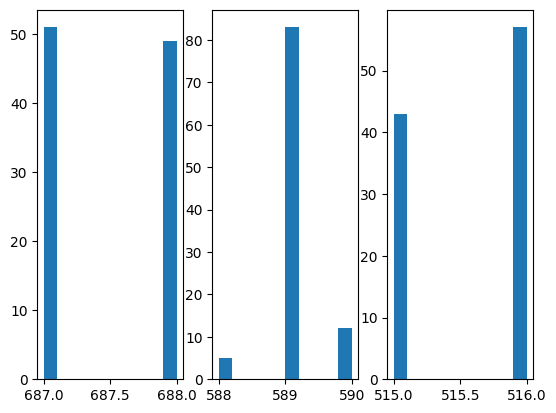

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].hist(plot_results())
ax[1].hist(plot_results(exp_var=0.95))
ax[2].hist(plot_results(exp_var=0.9))

The above results indicate the rank is very tightly distributed based on the explained variance. The reader is encouraged to play with the explained_variance and support the claim themselves.

In [6]:
## Now let's look at how tightly the weights are distributed in RoBERTa 
#roberta_large = torch.hub.load('pytorch/fairseq', 'roberta.large') 
roberta_base = torch.hub.load('pytorch/fairseq', 'roberta.base')

Using cache found in /home/mathadoor/.cache/torch/hub/pytorch_fairseq_main
DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): dl.fbaipublicfiles.com:80
DEBUG:urllib3.connectionpool:http://dl.fbaipublicfiles.com:80 "HEAD /fairseq/models/roberta.base.tar.gz HTTP/1.1" 200 0
INFO:fairseq.file_utils:loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.base.tar.gz from cache at /home/mathadoor/.cache/torch/pytorch_fairseq/37d2bc14cf6332d61ed5abeb579948e6054e46cc724c7d23426382d11a31b2d6.ae5852b4abc6bf762e0b6b30f19e741aa05562471e9eb8f4a6ae261f04f9b350
DEBUG:hydra.core.utils:Setting JobRuntime:name=utils


Unable to build Cython components. Please make sure Cython is installed if the torch.hub model you are loading depends on it.


DEBUG:hydra.core.utils:Setting JobRuntime:name=utils
INFO:fairseq.tasks.masked_lm:dictionary: 50264 types
INFO:fairseq.models.roberta.model:{'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 25, 'log_format': 'json', 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': True, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 4, 'fp16_scale_window': 128, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': 1.0, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': Fals

In [8]:
roberta_base.parameters

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_compiled_call_impl',
 '_float_tensor',
 '_forward_hooks',
 '_forward_hooks_always_called',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_post_hooks',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_per

In [44]:
for key, param in roberta_base.named_parameters():
    with torch.no_grad():
        key = ".".join(key.split(".")[3:])
        p_size = min(param.size())
        if len(param.size()) < 2:
            print(key, p_size)
            continue
        print(key, get_principle_direction(param, 0.99), p_size)

embed_tokens.weight 745 768
embed_positions.weight 439 514
layernorm_embedding.weight 768
layernorm_embedding.bias 768
layers.0.self_attn.k_proj.weight 652 768
layers.0.self_attn.k_proj.bias 768
layers.0.self_attn.v_proj.weight 667 768
layers.0.self_attn.v_proj.bias 768
layers.0.self_attn.q_proj.weight 653 768
layers.0.self_attn.q_proj.bias 768
layers.0.self_attn.out_proj.weight 669 768
layers.0.self_attn.out_proj.bias 768
layers.0.self_attn_layer_norm.weight 768
layers.0.self_attn_layer_norm.bias 768
layers.0.fc1.weight 748 768
layers.0.fc1.bias 3072
layers.0.fc2.weight 748 768
layers.0.fc2.bias 768
layers.0.final_layer_norm.weight 768
layers.0.final_layer_norm.bias 768
layers.1.self_attn.k_proj.weight 649 768
layers.1.self_attn.k_proj.bias 768
layers.1.self_attn.v_proj.weight 665 768
layers.1.self_attn.v_proj.bias 768
layers.1.self_attn.q_proj.weight 644 768
layers.1.self_attn.q_proj.bias 768
layers.1.self_attn.out_proj.weight 662 768
layers.1.self_attn.out_proj.bias 768
layers.1.sel

In [46]:
# On the surface the above results suggest you need most of the directions to account for most of the directions. 
# It will be useful to see which directions are affected and how later. 